# M3.D3: Thermodynamic properties of molecular ideal gases

## Learnig Objectives:

* Describe and represent how the vibrational partition function changes with the frequency and mass of the harmonic oscillator
* Calculate the vibrational contribution to the internal energy
* Describe and represent how the rotational partition function changes with molecular parameters such as bond distance and reduced mass
* Calculate the heat capacity of an ideal gas and assess how molecular parameters to contribute to it
* Use PySCF to calculate properties of a list of diatomic molecules and their corresponding macroscopic properties such as internal energy and heat capacity.

# The internal energy of a molecular ideal gas

Let's remember that in order to calculate the internal energy of a gas, one needs to consider the macrostate (sum of states) of the macroscopic system (all particles)

$$
U = <E> = k_B T^2 \left(\frac{\partial ln(Q)}{\partial T}\right)_{NV}
$$

And that if we assume that the particles of an ideal gas do not interact with each other, we can express the macroscopic partition function Q as a function of independent microscopic or molecular partition functions

$$
Q = \frac{q_{\text{molecule}}^N}{N!}
$$

So our next quest is to figure out the components of $q_{\text{molecule}}$. 
Compared to an atom, a molecule has now vibrational and rotational energy levels:

$$
E_{\text{molecule}} = E_{\text{translational}} + E_{\text{electronic}} 
+ E_{\text{rotational} } + E_{\text{vibrational} }

$$

And therefore the partition function of the molecule is:

$$
q_{molecule} = \sum_k^{all states}  e^{-\frac{E_k(molec)}{K_B T}} =\sum_k^{all states}  e^{-\frac{E_k(elec)+E_k(transl)+E_k(vib)+E_k(rot)}{K_B T}}=q_{elec}\cdot q_{transl}\cdot q_{vib}\cdot q_{rot}  
$$

In our previous session we already covered $q_{elec}$ and $q_{transl}$, now we can figure out the vibrational and rotational partition functions




# Vibrational partition function: Harmonic vibrational oscillator

Remember that under the harmonic oscillator approximation the vibrational levels were given by:

$$
\epsilon_{vib} = (v + 1/2)h\omega 
$$

with $v=0,1,2,3...$

In that case, the molecule vibrational partition function is

$$
q_{vib} = \sum_i e^{\frac{-\epsilon_{vib,i}}{k_B T}}=...= \frac{e^{\frac{-h\omega}{2k_B T}}}{1-e^{\frac{-h\omega}{k_B T}}}
$$

You may see in some context the use of the vibrational temperature $\Theta_{vib}=\frac{h\omega}{k_B T}$ and rewrite the vibrational partition function as

$$
q_{vib} = \frac{e^{\frac{-\Theta_{vib}}{2 T}}}{1-e^{\frac{-\Theta_{vib}}{T}}}
$$





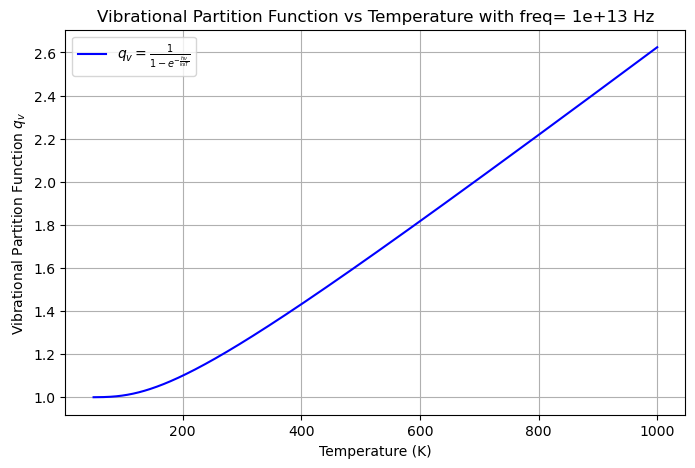

In [2]:
#plot the value of the vibrational partition function at different temperatures
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant (J·s)
k_B = 1.381e-23  # Boltzmann constant (J/K)
nu = 1e13  # Vibrational frequency (Hz)

# Temperature range
T = np.linspace(50, 1000, 500)  # Temperature from 50 K to 1000 K

# Vibrational partition function
q_v = 1 / (1 - np.exp(-h * nu / (k_B * T)))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(T, q_v, label=r'$q_v = \frac{1}{1 - e^{-\frac{h \nu}{k_B T}}}$', color='b')
plt.xlabel('Temperature (K)')
plt.ylabel('Vibrational Partition Function $q_v$')
plt.title(f'Vibrational Partition Function vs Temperature with freq= {nu:.0e} Hz')
plt.legend()
plt.grid(True)
plt.show()

**Your turn**

* Plot several curves investigating how the frequency and mass of the harmonic oscillator affects its partition function

## Vibrational contributions to the internal energy

If we use the above expression to see the vibrational contribution to the internal energy we get two contributions, the first one corresponds to a T-independent contribution from the Zero Point Energy and second is the contribution from excited vibrational states:

$$
U_{vib} = <E_{vib}> = N k_B T^2 \frac{\partial ln q_{vib}}{\partial T} = N k_B \left( \frac{\Theta_{vib}}{2} + \frac{\Theta_{vib}}{e^{\Theta_{vib}/T}-1} \right) = <E_{vib,ZPE}> + <E_{vib,excited}>
$$

**Your turn**

* Calculate the vibrational contributions to the internal energy at 300K for the different harmonic oscillators that you chose to represent on the plot.
* In each case build a table showing the ZPE contribution to the internal energy and the "excited" contribution at that Temperature.

# Rotational partition function: Rigid rotor

Remember that under the rigid rotor approximation the rotational levels are given by:

$$
\epsilon_{rot} = \frac{\hbar^2}{2I}J(J+1)
$$

with J = 0,1,2,3...

And if we define the rotational temperature as $\Theta_{rot}=\frac{\hbar^2}{2I k_B} $ the rotational partition function would be (skipping many steps here, check McQuarrie's textbook)

$$
q_{rot} = \sum_i (2J+1)e^{\frac{-\epsilon_{rot,i}}{k_B T}} =...=\frac{T}{\sigma\Theta_{rot}}
$$

Where $\sigma$ is a symmetry factor $\sigma=2$ for homonuclear diatomic and $\sigma=1$ for heteronuclear diatomic.



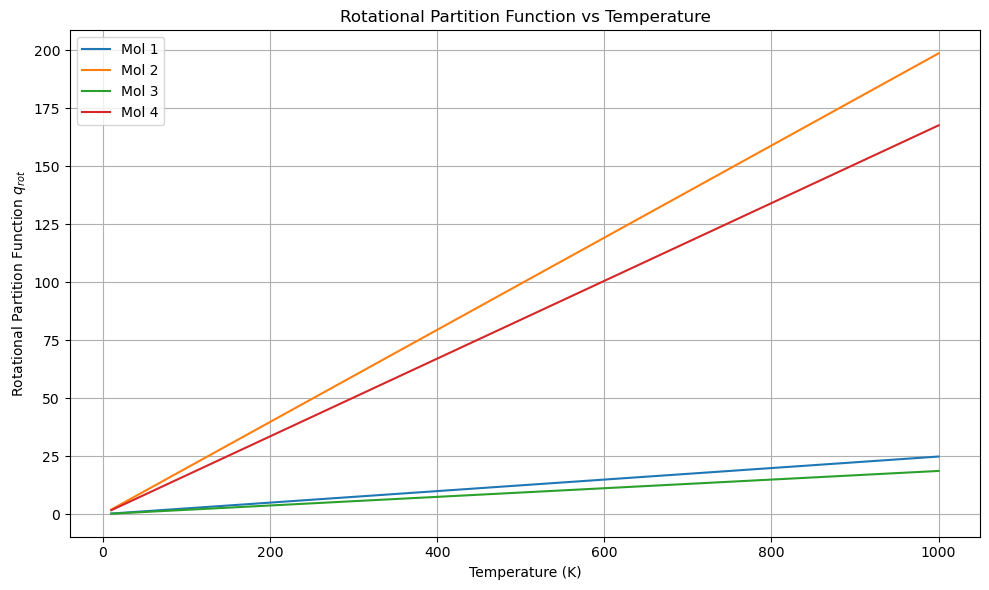

In [3]:
# Constants
h = 6.626e-34  # Planck's constant (J·s)
c = 3.00e8     # speed of light (m/s)
k = 1.381e-23  # Boltzmann constant (J/K)
pi = np.pi

def rotational_partition_function(T, mu, r, sigma=1):
    I = mu * r**2
    B = h / (8 * pi**2 * c * I)
    return (k * T) / (sigma * h * c * B)

# Temperatures (K)
T = np.linspace(10, 1000, 500)

# Molecule definitions: (mu, r, sigma)
molecules = {
    "Mol 1": (1.0e-27, 1.0e-10, 1),       # Arbitrary
    "Mol 2": (2.0e-27, 2.0e-10, 1),       # Double mass, double distance
    "Mol 3": (1.5e-27, 1.0e-10, 2),       # Even mass, homonuclear (σ = 2)
    "Mol 4": (3.0e-27, 1.5e-10, 1)        # Large mass, longer bond
}

# Plotting
plt.figure(figsize=(10, 6))

for label, (mu, r, sigma) in molecules.items():
    q_rot = rotational_partition_function(T, mu, r, sigma)
    plt.plot(T, q_rot, label=label)

plt.title("Rotational Partition Function vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Rotational Partition Function $q_{rot}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Your turn**

* Explain with your words what is the effect of mass, reduced mass and bond distance on the rotational partition function and how it changes with temperature

## Rotational contribution to the internal energy

Then using the expression of $q_{rot}$ we can calculate that the rotational contribution to the internal energy is approximately RT.

$$
U_{rot} = <E_{rot}> = N k_B T^2 \frac{\partial ln q_{rot}}{\partial T} \approx RT
$$



## The total internal energy of a diatomic ideal gas

Putting everything together we have four terms one for each different type of energy levels.

$$
U = <E_{total}> = <E_{transl}> + <E_{elec}> + <E_{vib}> + <E_{rot}>
$$

$$
U = \frac{3}{2}RT + "0" + R\left( \frac{\Theta_{vib}}{2} + \frac{\Theta_{vib}}{e^{\Theta_{vib}/T}-1} \right) + RT
$$

We see that the largest contributions to the internal energy are translations (3/2R) and rotations (R). 


#  Heat capacity of a gas

The heat capacity is by defintion how the internal energy changes as the temperature changes.

$$
C = \left(\frac{\partial U}{\partial T}\right)
$$

Depending on what variables we hold constant we will obtain the "$C_V$ heat capacity at constant volume" or "$C_p$ heat capacity at constant pressure"

$$
C_V = \left(\frac{\partial U}{\partial T}\right)_V\;\;C_p=\left(\frac{\partial U}{\partial T}\right)_p
$$

Since we already know the expression for $U$ we just need to derivate with respect to the temperature.

For a monoatomic ideal gas

$$
C_V = \left( \frac{\partial (3/2 RT)}{\partial T}\right )_V = 3/2 R
$$

For a diatomic ideal gas the largest contributions will be translational and rotational, but vibrational will depend on the molecule and the temperature. In general, the closer the energy levels are, the higher the partition function and the larger its contribution to the internal energy and heat capacity.

For diatomic ideal gas:

$$
C_V = translations + rotations + vibrationZPE \cdot vibrationExcited
$$

$$
C_V = \frac{3}{2}R + R + \frac{\Theta_{vib}^2}{T^2} \frac{e^{-\Theta_{vib}T}}{(1-e^{-\Theta_{vib}T})^2}
$$


**Your turn**

* Build a table that shows for a generic molecule (use a generic bond distance, frequency, and mass) the value of translational, rotational, vibrational contributions to the heat capacity at different temperatures

# Calculating macroscopic thermodynamic properties with PySCF

As you saw above molecular parameters such as vibrational frequency, bond distance as moment of inertia will be needed to calculate macroscopic properties such as internal energy and heat capacity. We can use the PySCF library to calculate the parameters of real molecules.

In [ ]:
#pip install geometric

from pyscf import gto
from pyscf.geomopt.geometric_solver import optimize
from pyscf.hessian import thermo
from pyscf import lib

# Convert from Bohr to Angstroms
bohr_to_angstrom = lib.parameters.BOHR 

molCO = gto.M(
    atom = 'O 0 0 0; C 0 0 1.3',  # in Angstrom
    basis = '631g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=3,
    output='m3d2_co_fq.out'
)
# Perform the Hartree-Fock calculation
co_sp = molCO.RHF.run()
co_opt = optimize(co_sp).run()
print("Optimized CO structure:")
print(co_opt.atom_coords()*bohr_to_angstrom)
hessian = co_sp.Hessian().kernel()

# Frequency analysis
freq_info = thermo.harmonic_analysis(co_sp.mol, hessian)
# Thermochemistry analysis at 298.15 K and 1 atmospheric pressure
thermo_info = thermo.thermo(co_sp, freq_info['freq_au'], 298.15, 101325)


print('Rotation constant')
print(thermo_info['rot_const'])

print('Zero-point energy')
print(thermo_info['ZPE'   ])

print('Internal energy at 0 K')
print(thermo_info['E_0K'  ])

print('Internal energy at 298.15 K')
print(thermo_info['E_tot' ])

print('Heat capacity at 298.15 K')
print(thermo_info['Cv_tot'])

In [ ]:
print(freq_info)
print(thermo_info)


**Your turn**

Use the CO example above to calculate other molecules:
In a separate notebook, for each of the following molecules: CO, N2, O2(use singlet!), F2, HF, HCl, CN(-), OH(-), H2

* Optimize the structure
* Run a frequency analysis of the optimized structure. Save the output each in a separate file
* Build a function that for a given output file it reports a list of thermodynamic data such as the electronic, translational, rotational, and vibrational contributions to internal energy and heat capacity.

Build a table with those data.

Identify the most important contributions: compare what contributes the most to the internal/thermal energy, is it translational, rotational, and vibrational contributions?

#  Questions

* Submit in a separate notebook the exercises listed above